This chapter gets us from the univariate Kalman filter to the multivariate kalman filter.

Let's examine how each of the concepts change.

### Prediction

**Mean**

For the univariate case it's $\bar{x} = x + dx$. The more general multivariate case is

$$
\bold{\bar{x}} = \bold{Fx} + \bold{Bu}
$$

where $\bold{F}$ is the state transition function and $\bold{B}$ is the control function, and $\bold{u}$ is the control input. Following our dog model from before we have:

- $\bold{x} = [x, \dot{x}]$
- $\bold{F} = \begin{bmatrix}1&\Delta t  \\ 0&1\end{bmatrix}$
- $\bold{B}$ and $\bold{u}$ are 0 because we assume we can't control the dog.

**Covariance**

For the univariate case we just added the variances, so it was $\bar{P} = P + Q$. Now we have $\bold{P}$ for the state covariance and $\bold{Q}$ for the process covariance. We can't simply write $\bold{\bar{P}} = \bold{P} + \bold{Q}$ because we need to worry about state covariance. So for a constanct velocity model, there is clearly covariance between the velocity and the position after we have done our first time step, so even if $\bold{P}$ has no off-diagonals to start with, it should after the first step, and that's because of the process function $\bold{F}$. In matrix terms, if the process function has off-diagonals, it's likely that will introduce covariance into the state estimate. Let's go from first principles to figure out what the expression should be. Let's say that the expected value of $\bold{\vec{X}}$ prior to the predict step is $\mathbb{E}[\bold{\vec{X}}]$. I have used $\bold{\vec{X}}$ because I am talking about a vector of random variables an not the state vector $\bold{x}$ (the vector arrow helps distinguish it from a matrix). Then we run the predict step (let's ignore the $\bold{Bu}$ term for now) and wish to find the new process covariance. The new state would be $\bold{Fx}$ and the new expected value would be $\bold{F\bar{X}}$

$$
\begin{align}
\bold{\bar{P}} &= \mathbb{E}\bigl[(\bold{F\vec{X}} - \bold{F\mathbb{E}[\bold{\vec{X}}]})(\bold{F\vec{X}} - \bold{F\mathbb{E}[\bold{\vec{X}}]})^\intercal \bigr] \\
&= \mathbb{E}\bigl[\bold{F}(\bold{\vec{X}} - \mathbb{E}[\bold{\vec{X}}])(\bold{\vec{X}} - \mathbb{E}[\bold{\vec{X}}])^\intercal \bold{F}^\intercal \bigr] \\
&= \bold{F}(\mathbb{E}\bigl[(\bold{\vec{X}} - \mathbb{E}[\bold{\vec{X}}])(\bold{\vec{X}} - \mathbb{E}[\bold{\vec{X}}])^\intercal \bigr])\bold{F}^\intercal \\
&= \bold{FPF^\intercal}
\end{align}
$$


So overall the expressions should for the multivariate Kalman filter update of the state covariance is:

$$
\bar{\bold{P}} = \bold{FPF^\intercal} + \bold{Q}
$$

### Update

**Mean**

Recall that the update for the mean from the univariate case was $x = \bar{x} + Ky$ where $y = z - \bar{x}$ is the residual and we have the Kalman gain $K = \bar{P} / (\bar{P} + R)$ with $R$ being the measurement variance. So in the multivariate case we have 

$$
\bold{x} = \bold{\bar{x}} + \bold{Ky}
$$

Now $\bold{y} = \bold{z} - \bold{H\bar{x}}$ is a vector of residuals in units of our measurement space. $\bold{z}$ is a vector of measurements (remind yourself that size of $\bold{z}$ need not be the same as the size of $\bold{x}$, ie there's no reason there should be the same amount of sensors as there are variables in the state space we choose to model our problem).

$\bold{H}$ (dimension $d_{\bold{z}} \times d_{\bold{x}}$ where $d_{\bold{z}}$ is the dimensionality of the measurement space and $d_{\bold{x}}$ is the dimensionality of the state space) is the **measurement function** which is needed so that whatever we are subtracting from $\bold{z}$ is also in measurement space (we just neglected this in the univariate case because for our examples the measurements were in the sames units as the state space). As a side note: why don't we just convert everything to state space? It's because a measurement usually captures an observable that does not necessarily fully represent the state. ie, usually $\bold{H}$ does not have an inverse.

Now comes the more complicated part which is figuring out what $\bold{K}$ is supposed to mean. Looking at the equation for the mean update we know that $\bold{K}$ should have dimensions $d_{\bold{x}} \times d_{\bold{z}}$, ie it should bring us from measurement space back into state space. From the univariate kalman filter we need some notion of finding the ratio between the prior's covariance and the **system uncertainty**, i.e. the sum of the prior's covariance and the measurement variance. To add these together we need to put the prior's covariance into measurement space, and to do so use a similar projection operation like we did with $\bold{FPF^\intercal}$. So the system uncertainty is $\bold{S} = \bold{H\bar{P}H^\intercal} + \bold{R}$ and this has dimensions $d_{\bold{z}} \times d_{\bold{z}}$. Then we can compute the Kalman gain as $\bold{K} = \bold{\bar{P}H^\intercal S^{-1}}$ and this has dimensions $d_{\bold{x}} \times d_{\bold{z}}$. So the $\bold{S}^{-1}$ is like the denominator in the univariate case, the $\bold{\bar{P}}$ is like the numerator, and the $\bold{H}^\intercal$ is there to make sure that the end effect is for $\bold{K}$ to move from measurement space back to state space. This isn't a very clean justification but it will do for now because in later chapters we will approach the math more rigorously.

**Covariance**

The covariance update for the univariate case was $P = (1 - K)\bar{P}$. For the multivariate case it's

$$
\bold{P} = (\bold{I} - \bold{KH})\bold{\bar{P}}
$$

The analogy is fairly straight forward. We just need to remember that $\bold{K}$ is $d_{\bold{x}} \times d_{\bold{z}}$ so we need the $\bold{H}$ which is  $d_{\bold{z}} \times d_{\bold{x}}$ to get back into the state space.

## Cheat Sheet

<u>**Predict**</u>

$\begin{array}{|l|l|l|}
\hline
\text{Univariate} & \text{Univariate} & \text{Multivariate}\\
& \text{(Kalman form)} & \\
\hline
\bar \mu = \mu + \mu_{f_x} & \bar x = x + dx & \bar{\mathbf x} = \mathbf{Fx} + \mathbf{Bu}\\
\bar\sigma^2 = \sigma_x^2 + \sigma_{f_x}^2 & \bar P = P + Q & \bar{\mathbf P} = \mathbf{FPF}^\mathsf T + \mathbf Q \\
\hline
\end{array}$

Without worrying about the specifics of the linear algebra, we can see that:

$\mathbf x,\, \mathbf P$ are the state mean and covariance. They correspond to $x$ and $\sigma^2$.

$\mathbf F$ is the *state transition function*. When multiplied by $\bf x$ it computes the prior. 

$\mathbf Q$ is the process covariance. It corresponds to $\sigma^2_{f_x}$.

$\mathbf B$ and $\mathbf u$ are new to us. They let us model control inputs to the system.

<u>**Update**</u>

$\begin{array}{|l|l|l|}
\hline
\text{Univariate} & \text{Univariate} & \text{Multivariate}\\
& \text{(Kalman form)} & \\
\hline
& y = z - \bar x & \mathbf y = \mathbf z - \mathbf{H\bar x} \\
&  & \bold{S} = \bold{H\bar{P}H^\intercal} + \bold{R}\\
& K = \frac{\bar P}{\bar P+R}&
\mathbf K = \mathbf{\bar{P}H}^\mathsf T \bold{S}^{-1} \\
\mu=\frac{\bar\sigma^2\, \mu_z + \sigma_z^2 \, \bar\mu} {\bar\sigma^2 + \sigma_z^2} & x = \bar x + Ky & \mathbf x = \bar{\mathbf x} + \mathbf{Ky} \\
\sigma^2 = \frac{\sigma_1^2\sigma_2^2}{\sigma_1^2+\sigma_2^2} & P = (1-K)\bar P &
\mathbf P = (\mathbf I - \mathbf{KH})\mathbf{\bar{P}} \\
\hline
\end{array}$

$\mathbf H$ is the measurement function. We haven't seen this yet in this book and I'll explain it later. If you mentally remove $\mathbf H$ from the equations, you should be able to see these equations are similar as well.

$\mathbf z,\, \mathbf R$ are the measurement mean and noise covariance. They correspond to $z$ and $\sigma_z^2$ in the univariate filter (I've substituted $\mu$ with $x$ for the univariate equations to make the notation as similar as possible).

$\mathbf y$ and $\mathbf K$ are the residual and Kalman gain. 

## Exercise: Show Effect of Hidden Variables

In our filter, velocity is a hidden variable. How would a filter perform if we did not use velocity in the state?

Write a Kalman filter that uses the state $\mathbf x=\begin{bmatrix}x\end{bmatrix}$ and compare it against a filter that uses $\mathbf x=\begin{bmatrix}x & \dot x\end{bmatrix}^\mathsf T$.

In [69]:
import numpy as np

class KalmanFilter:
    def __init__(self, x, P, F, Q, H, R, B=None, do_track_state=False):
        assert x.ndim == 1
        self.x_dim = len(x)
        self.x = x
        assert tuple(P.shape) == (self.x_dim, self.x_dim), f"P needs shape ({self.x_dim}, {self.x_dim}) to match x"
        self.P = P
        assert tuple(F.shape) == (self.x_dim, self.x_dim), f"F needs shape ({self.x_dim}, {self.x_dim}) to match x"
        self.F = F
        assert tuple(Q.shape) == (self.x_dim, self.x_dim), f"Q needs shape ({self.x_dim}, {self.x_dim}) to match x"
        self.Q = Q
        assert H.shape[1] == self.x_dim, f"H needs shape (z_dim, {self.x_dim} to match x"
        self.z_dim = H.shape[0]
        self.H = H
        assert tuple(R.shape) == (self.z_dim, self.z_dim), f"R needs shape ({self.z_dim}, {self.z_dim}) to match H"
        self.R = R
        if B is not None:
            assert tuple(B.shape) == (self.x_dim, self.x_dim), f"B needs shape ({self.x_dim}, {self.x_dim}) to match x"
        self.B = B
        self.last_step = 'init'
        self._do_track_state = do_track_state
        if self._do_track_state:
            self._ts_step = []
            self._ts_x = []
            self._ts_P = []
            self._track_state()
        
    def predict(self, u=None):
        if u is not None:
            assert self.B is not None, "You provided a control input but no control function is specified"
        self.x = self.F @ self.x + (self.B @ u if self.B is not None else 0)
        self.P = self.F @ self.P @ self.F.T + self.Q
        self.last_step = 'predict'
        if self._do_track_state:
           self._track_state() 

    def update(self, z):
        assert z.ndim == 1
        assert len(z) == self.z_dim, (
            f"From H, the measurement spaces is expected to have dimensionality {self.z_dim}, but the provided z has "
            f"dimensionality {len(z)}")
        y = z - self.H @ self.x
        S = self.H @ self.P @ self.H.T + self.R
        K = self.P @ self.H.T @ np.linalg.inv(S)
        self.x += K @ y
        self.P = self.P - K @ self.H @ self.P
        self.last_step = 'update'
        if self._do_track_state:
           self._track_state() 

    def _track_state(self):
        self._ts_step.append(self.last_step)
        self.ts_step = np.array(self._ts_step)
        self._ts_x.append(self.x)
        self.ts_x = np.array(self._ts_x)
        self._ts_P.append(self.P)
        self.ts_P = np.array(self._ts_P )

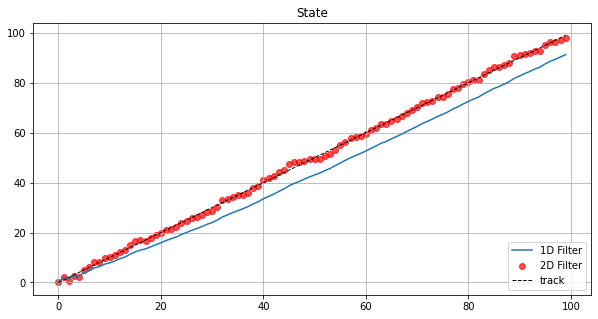

In [73]:
from filterpy.common import Q_discrete_white_noise

# Assuming time step is dt = 1.
x_true_0 = np.array([0., 1.])  # true initial state
vel = 1. # true constant velocity
dt = 1.

P_0 = 50.  # initial state variance
Q = .02  # process variance
R = 5.   # measurement variance

kf_1d = KalmanFilter(
    x=x_true_0[0:1],
    P=np.array([[P_0]]), # initial state variance
    F=np.array([[1.]]), # process function. With 1D I guess my best guess is to assume the dog stays still.
    Q=np.array([[Q]]), # process variance
    H=np.array([[1.]]), # measurement function
    R=np.array([[R]]), # measurement uncertainty
    B=np.array([[1.]]), # control function
    do_track_state=True
)

kf_2d = KalmanFilter(
    x=x_true_0,
    P=np.eye(2)*P_0, # initial state covariance
    F=np.array([[1., vel * dt], [0., 1.]]), # process function
    Q=Q_discrete_white_noise(dim=2, dt=dt, var=Q), # process covariance
    H=np.array([[1., 0.]]), # measurement function
    R=np.array([[R]]), # measurement uncertainty
    do_track_state=True
)


ts_x_true = []
ls_z = []
for i in range(100):
    if i == 0:
        ts_x_true.append(x_true_0)
    else:
        kf_1d.predict(u=np.array([0.5]))
        kf_2d.predict()
        ts_x_true.append(np.array([ts_x_true[-1][0] + vel, 1.]))  # true update (because we are running a simulation)
        z = ts_x_true[-1][0] + np.random.randn() * np.sqrt(R)
        kf_1d.update(np.array([z]))
        kf_2d.update(np.array([z]))


import matplotlib.pyplot as plt

def plot_1d_2d(xs, xs1d, xs2d):
    _, ax = plt.subplots(figsize=(10, 5))
    ax.plot(xs1d, label='1D Filter')
    ax.scatter(range(len(xs2d)), xs2d, c='r', alpha=0.7, label='2D Filter')
    ax.plot(xs, ls='--', color='k', lw=1, label='track')
    ax.set_title('State')
    ax.legend(loc=4)
    ax.grid()
    plt.show()

plot_1d_2d(np.array(ts_x_true)[:, 0], kf_1d.ts_x[kf_1d.ts_step != 'predict'][:, 0], kf_2d.ts_x[kf_1d.ts_step != 'predict'][:, 0])

This chapter goes on to discuss a bunch of filter design considerations, particularly for $Q$ and $R$.